<a href="https://colab.research.google.com/github/SevdeSalkim/TensorFlow_Fundamentals/blob/master/01_TensorFlow_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# one_hot encoding
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [16]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [17]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [7]:
# create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 8648.7988 - mae: 8648.7988
Epoch 2/100
34/34 [==============================] - 0s 985us/step - loss: 7869.3242 - mae: 7869.3242
Epoch 3/100
34/34 [==============================] - 0s 974us/step - loss: 7616.2949 - mae: 7616.2949
Epoch 4/100
34/34 [==============================] - 0s 949us/step - loss: 7798.5093 - mae: 7798.5093
Epoch 5/100
34/34 [==============================] - 0s 959us/step - loss: 7687.9399 - mae: 7687.9399
Epoch 6/100
34/34 [==============================] - 0s 949us/step - loss: 7613.0806 - mae: 7613.0806
Epoch 7/100
34/34 [==============================] - 0s 967us/step - loss: 7577.2271 - mae: 7577.2271
Epoch 8/100
34/34 [==============================] - 0s 945us/step - loss: 7788.1475 - mae: 7788.1475
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7585.2026 - mae: 7585.2026
Epoch 10/100
34/34 [==============================] - 0s 959us/step - loss: 7684.5059 

In [9]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 8056.1006 - mae: 8056.1006


[8056.1005859375, 8056.1005859375]

Modelimizin daha iyileştirmek için
* Katman sayısını arttırıcaz.
* Her katmandaki birim sayısını arttırmak.
* optimizer değiştirilicek(SGD - Adam)


In [10]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])


history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [11]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4763.4292 - mae: 4763.4292


[4763.42919921875, 4763.42919921875]

##  Not: Birçok sorun için Adam optimizer harika bir başlangıç ​​seçimidir.

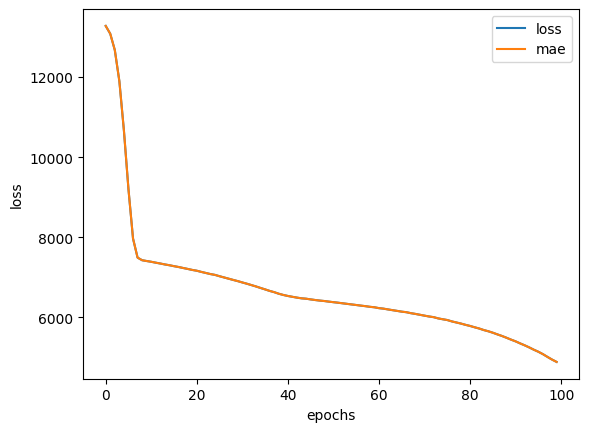

In [12]:
# Plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [13]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [14]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 3494.2900 - mae: 3494.2900


(3494.2900390625, 3494.2900390625)

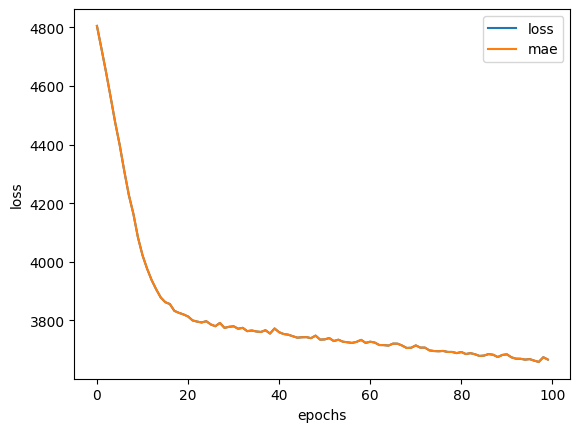

In [15]:
# Plot history
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

## Preprocessing data (Normalization and standardization)

* Verilerin normalleştirilmesi (tüm değerlerin 0 ile 1 arasında olduğundan emin olunması).

* Standardizasyon (tüm değerlerin ortalamasının 0 ve varyansının 1 olduğundan emin olmasıdır.)

Hangisini kullanmalıyız?

Sinir ağları 0 ile 1 arasındaki değerleri tercih etme eğiliminde olduklarından normalleştirmeyi tercih etme eğiliminde olacaksınız

In [18]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    ( MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker", "region"])
)

X= insurance.drop("charges", axis=1)
y= insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [20]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [21]:
X_train_normal.shape , X_train.shape

((1070, 11), (1070, 6))

In [25]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

history_3 = insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [28]:
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)
insurance_model_3_loss, insurance_model_3_mae

9/9 [==============================] - 0s 2ms/step - loss: 3168.8149 - mae: 3168.8149


(3168.81494140625, 3168.81494140625)

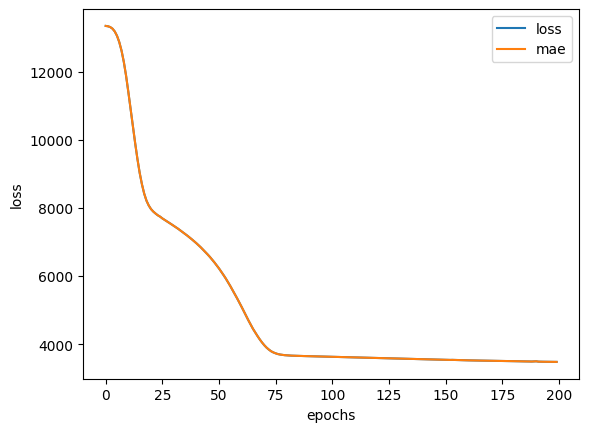

In [29]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");